<a href="https://colab.research.google.com/github/Anfevazu/scritps_Data/blob/master/Trabajo_1_Progrmacion_Febrero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TRABAJO 1, PRIMER CORTE**
>>**Maestría en Analítica de Datos**

>>**Facultad de Ingeniería y Ciencias Básicas.**

>>**Universidad Central  2020 - I**


> >*ANDRES FELIPE VASQUEZ*

> >*GUSTAVO ADOLFO DIAZ*

>**Descripción del problema a resolver :**

> > <p style='text-align: justify;'> Se requiere un programa en python que devuelva el valor aproximado de la integral (área
bajo la curva) de una función matemática en un intervalo dado entre dos valores xInicial y
xFinal. Las funciones que se deben ofrecer son: </p> 

> - **seno**
> - **coseno**
> - **tangente**
> -**exponencial** 

> > <p style='text-align: justify'> Cada función matemática se debe calcular mediante una función de python usando las
series de Taylor. Para calcular el valor aproximado de la integral en el intervalo (xInicial,
xFinal) se debe dividir el intervalo en una cantidad de rectángulos de igual ancho, esta
cantidad se debe dar como parámetro. <br><br>
Cada rectángulo tiene un ancho fijo y una altura que
depende del valor de la función matemática. Luego, se suma el área de todos los
rectángulos y ese es el valor que corresponde a la integral. Además se requiere una
función para calcular el factorial. </p> 


>---




## 1. Definiciones 

* __Serie de Taylor__: En matemáticas, una serie de Taylor es una aproximación de funciones mediante una serie de potencias o suma de potencias enteras de polinomios como :  $\left ( x - a \right )^{n} $, llamados términos de la serie, dicha suma se calcula a partir de las derivadas de la función para un determinado valor o punto $a$ suficientemente derivable sobre la función y un entorno sobre el cual converja la serie. A la serie centrada sobre el punto cero, $a=0$, se le denomina también serie de Maclaurin. <br> Esta aproximación tiene tres ventajas importantes: <br>
la derivación e integración de una de estas series se puede realizar término a término, que resultan operaciones triviales;
se puede utilizar para calcular valores aproximados de funciones;
es posible calcular la optimidad de la aproximación. <br>
Algunas funciones no se pueden escribir como serie de Taylor porque tienen alguna singularidad. En estos casos normalmente se puede conseguir un desarrollo en serie utilizando potencias negativas de x (véase Serie de Laurent). Por ejemplo $f(x) = exp(\frac{1}{x^{2}})$ se puede desarrollar como serie de Laurent. <br>
La serie de Taylor de una función f real o compleja ƒ(x) infinitamente diferenciable en el entorno de un número real o complejo a es la siguiente serie de potencias:
<br><br> 
$f(a)+\frac{f'(a)}{1!}(x-a)+\frac{f''(a)}{2!}(x-a)^2+\frac{f^{(3)}(a)}{3!}(x-a)^3+\cdots$ <br><br>
[Series de Taylor](https://es.wikipedia.org/wiki/Serie_de_Taylor)

---



- **Codigo Python para esta funcion** : 
```python
# Calcular Integral como la Sumatoria del Area bajo la Curva.
def calculate_integral(x_initial, x_final, function=4, interval=20):
    """ Funcion para el calculo del area de un area bajo la curva usando Series de Taylor

    argumentos : 
    x_initial : float - Valor inicial del intervalo dado por el usuario.
    x_final : float - Valor final del intervalo dado por el usuario.
    function : int - Tipo de funcion a evaluar : 
    1 = Seno
    2 = Coseno
    3 = Tangente
    4 = Exponencial
    Por defecto el valor inicial es 4 = Exponencial.
    interval : int - parametro para la cantidad de rectangulos en los cuales se divide el intervalo, por defecto es 20.
    
    Valores de Retorno
    -------
    resultado del calculo del area segun la opcion seleccionada, el area se calcula
    restando el area del intervalo final, menos el area del intervalo inicial.

    Valores de Error
    -------
    Si los datos de entrada son del tipo string se genera un mensaje de error.
    NO se permiten valores de texto para realizar los calculos
    """
   
    if type(x_initial) is str or type(x_final) is str or type(function) is str or type(interval) is str : 
        print("NO se permiten valores de texto para realizar los calculos")
        return "Error"

    if function == 1:
        area = calculate_taylor_sen_x(x_final, interval) - calculate_taylor_sen_x(x_initial, interval)
        print("El area bajo la curva para la funtion seno(x) para los puntos : ", "Xo=",x_initial ,",", "X1=",x_final, " es igual a : ", abs(area))
        x, y = graficate_sin(x_initial, x_final)
        return abs(area)
    elif function == 2:
        area = calculate_taylor_cos_x(x_final, interval) - calculate_taylor_cos_x(x_initial, interval)
        print("El area bajo la curva para la funtion cos(x) para los puntos : ", "Xo=",x_initial ,",", "X1=",x_final, " es igual a : ", abs(area))
        graficate_cos(x_initial, x_final)
        return abs(area)
    elif function == 3:
        area = calculate_taylor_tan_x(x_final, interval) - calculate_taylor_tan_x(x_initial, interval)
        print("El area bajo la curva para la funtion tan(x) para los puntos : ", "Xo=",x_initial ,",", "X1=",x_final, " es igual a : ", abs(area))
        graficate_tan(x_initial, x_final)
        return abs(area)
    else :
        area = funtion_exponential(x_final, interval) - funtion_exponential(x_initial, interval)
        print("El area bajo la curva para la funtion tan(x) para los puntos : ", "Xo=",x_initial ,",", "X1=",x_final, " es igual a : ", abs(area))
        graficate_exp(x_initial, x_final)
        return abs(area)
    
    ```
***



* __Series de Maclaurin notables__: A continuación se enumeran algunas series de Taylor de funciones básicas. Todos los desarrollos son también válidos para valores complejos de x.
[Series de Maclaurin notables](https://es.wikipedia.org/wiki/Serie_de_Taylor#Series_de_Maclaurin_notables)

1. **Función exponencial:** <br>
$ e^{x} = \sum^{\infty}_{n=0} \frac{x^n}{n!}\quad, \forall x; n \in \mathbb{N}_0$

- **Codigo Python para esta funcion** : 

```python
# Calculo area bajo la curva de una funcion exponencial 
def funtion_exponential(point, interval):
    """
    Funcion para calcular el area bajo la curva de una funcion exponencial.

    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado.
    interval : int - Numero de intervalos a evaluar bajo la curva.
    
    Valores de Retorno
    -------
    suma : float - Area bajo la curva en el intervalo dado.
    """
    suma = 0
    for i in range(interval):
        suma += calculate_exponential(point,i)
    return suma

def calculate_exponential(point, point_interval):
    """
    Funcion para la sumatoria para el calculo de un punto especifico del intervalo

    argumentos : 
    point : float - Valor de Xo en un punto dado.
    point_interval : int - valor del intervalo a evaluar en la funcion exponencial.
    
    Valores de Retorno
    -------
    int - valor de la funcion exponencial.
    """
    return (point ** point_interval) / factorial(point_interval)
```

***


2. **Función Seno:** <br>
$\sin x = \sum \frac{(-1)^{n}}{(2n+1)!}x^{2n+1}$
- **Codigo Python para esta funcion** : 

```python
# Calcular Area bajo la curva usando la funcion seno en series de Taylor
def calculate_taylor_sen_x(point, interval):
    """
    Funcion para calcular el area bajo la curva de una funcion seno.
    
    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado.
    interval : int - Numero de intervalos a evaluar bajo la curva.
    
    Valores de Retorno
    -------
    suma : float - Area bajo la curva en el intervalo dado.
    """
    suma = 0
    for i in range(interval):
        suma += taylor_sin_x(point,i)
    return suma

def taylor_sin_x(point, point_interval):
    """
    Funcion para el Desarrollo de la Serie de Taylor del Seno de X.
    Devuelve el desarrollo de la serie de taylor para n en un punto del Intervalo.

    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado
        
    point_interval : int - Valor del intervalo a evaluar
    
    Valores de Retorno
    -------
    float - Retorna el valor del area en el intervalo dado
    """
    numerator = ((-1)**(point_interval)) * (point**((2*point_interval)+1))
    denominator = factorial((2*point_interval)+1)

    return numerator / denominator
```

***

3. **Función Coseno:** <br>
$\cos x = \sum \frac{(-1)^{n}}{(2n)!}x^{2n}$
- **Codigo Python para esta funcion** : 

```python
# Calcular Area bajo la curva usando la funcion coseno en series de Taylor
def calculate_taylor_cos_x(point, interval):
    """
    Funcion para calcular el area bajo la curva de una funcion coseno.
 
    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado.
    interval : int - Numero de intervalos a evaluar bajo la curva.
 
    Valores de Retorno
    -------
    suma : float - Area bajo la curva en el intervalo dado.
    """
    suma = 0
    for i in range(interval):
        suma += taylor_cos_x(point,i)
    return suma

def taylor_cos_x(point, point_interval):
    """
    Funcion para el Desarrollo de la Serie de Taylor del Coseno de X.
    Devuelve el desarrollo de la serie de taylor para n en un punto del Intervalo.
 
    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado
    point_interval : int - Valor del intervalo a evaluar
 
    Valores de Retorno
    -------
    float - Retorna el valor del area en el intervalo dado
    """
    numerator = ((-1)**(point_interval)) * (point**(2*point_interval))
    denominator = factorial(2*point_interval) 

    return numerator / denominator
```

***




4. **Función Tangente:** <br>
$\tan x = \sum \frac{B_{2n}(-4)^{n}(1-4^{n})}{2n!}x^{2n-1} $
- **Codigo Python para esta funcion** : 

```python
# Calcular Area bajo la curva usando la funcion Tangente en series de Taylor
def calculate_taylor_tan_x(point, interval):
    """
    Funcion para calcular el area bajo la curva de una funcion tangente.
 
    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado.
    interval : int - Numero de intervalos a evaluar bajo la curva.
 
    Valores de Retorno
    -------
    suma : float - Area bajo la curva en el intervalo dado.
    """
    suma = 0
    for i in range(interval):
        suma += taylor_tan_x(point,i)
    return suma

def taylor_tan_x(point, point_interval):
     """
    Funcion para el Desarrollo de la Serie de Taylor del tangente de X.
    Devuelve el desarrollo de la serie de taylor para n en un punto del Intervalo.
 
    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado
    point_interval : int - Valor del intervalo a evaluar
 
    Valores de Retorno
    -------
    float - Retorna el valor del area en el intervalo dado
    """
    numerator = (calculate_bernoulli_number(point_interval * 2) * ((-4)** point_interval) * (1- 4** point_interval)) * (point ** (( 2 * point_interval) - 1))
    denominator = factorial(2*point_interval)

    return numerator / denominator

# Funcion para calcular numero de Bernoulli
def calculate_bernoulli_number(number):
    """
    Argumentos
    ----------
    number : int - numero para el cual deseamos calcular el valor de Bernoulli 

    Valores de Retorno
    ------
    float - numero de bernoulli
    """
    EULER = 2.7182818284590455    
    return abs(number) / (EULER ** abs(number))
```

***




4. **Función Factorial :** <br>
El factorial de un entero positivo n, el factorial de n o n factorial se define en principio como el producto de todos los números enteros positivos desde 1 (es decir, los números naturales) hasta n. Por ejemplo:
${\ 5!=1\times 2\times 3\times 4\times 5=120.\ }5! = 1  \times  2  \times 3 \times  4 \times  5= 120.  \ $ <br> [Factorial](https://es.wikipedia.org/wiki/Factorial)
- **Codigo Python para esta funcion** : 


```python
# Funcion para calcular el factorial de un numero (n) dado, usando el concepto de recursividad
def factorial(number):
    """
    Funcion para el calculo del Factorial de un numero dado

    Argumentos
    ----------
    number : int - numero entero para calculo del factorial
    """
    if number <= 1: 
        return 1 
    else:
        return number * factorial(number-1)
```
***


# SOLUCION COMPLETA DEL PROBLEMA PROPUESTO 


In [0]:
#-----------------------------------------------------------------------------------------------------------------------
# Librerias para graficar las funciones 

import matplotlib.pyplot as plt
import numpy as np

# funcion que grafica la funcion seno 
def graficate_sin(xInicial, xFinal):
    plt.plot(np.linspace(xInicial, xFinal), np.sin(np.linspace(xInicial, xFinal)))
    return np.linspace(xInicial, xFinal), np.sin(np.linspace(xInicial, xFinal))

# funcion que grafica la funcion coseno
def graficate_cos(xInicial, xFinal):
    plt.plot(np.linspace(xInicial, xFinal), np.cos(np.linspace(xInicial, xFinal)))
    return np.linspace(xInicial, xFinal), np.cos(np.linspace(xInicial, xFinal))


# funcion que grafica tangente 
def graficate_tan(xInicial, xFinal):
    plt.plot(np.linspace(xInicial, xFinal), np.tan(np.linspace(xInicial, xFinal)))
    return np.linspace(xInicial, xFinal), np.tan(np.linspace(xInicial, xFinal))


# funcion que grafica exponential  
def graficate_exp(xInicial, xFinal):
    plt.plot(np.linspace(xInicial, xFinal), np.exp(np.linspace(xInicial, xFinal)))
    return np.linspace(xInicial, xFinal), np.exp(np.linspace(xInicial, xFinal))
#-----------------------------------------------------------------------------------------------------------------------


# Calcular Integral como la Sumatoria del Area bajo la Curva.
def calculate_integral(x_initial, x_final, function=4, interval=20):
    """ Funcion para el calculo del area de un area bajo la curva usando Series de Taylor

    argumentos : 
    x_initial : float - Valor inicial del intervalo dado por el usuario.
    x_final : float - Valor final del intervalo dado por el usuario.
    function : int - Tipo de funcion a evaluar : 
    1 = Seno
    2 = Coseno
    3 = Tangente
    4 = Exponencial
    Por defecto el valor inicial es 4 = Exponencial.
    interval : int - parametro para la cantidad de rectangulos en los cuales se divide el intervalo, por defecto es 20.
    
    Valores de Retorno
    -------
    resultado del calculo del area segun la opcion seleccionada, el area se calcula
    restando el area del intervalo final, menos el area del intervalo inicial.

    Valores de Error
    -------
    Si los datos de entrada son del tipo string se genera un mensaje de error.
    NO se permiten valores de texto para realizar los calculos
    """
    if type(x_initial) is str or type(x_final) is str or type(function) is str or type(interval) is str : 
        print("NO se permiten valores de texto para realizar los calculos")
        return "Error"

    # calculando integral de la funcion seno
    if function == 1:
        area = calculate_taylor_sen_x(x_final, interval) - calculate_taylor_sen_x(x_initial, interval)
        print("El area bajo la curva para la funtion seno(x) para los puntos : ", "Xo=",x_initial ,",", "X1=",x_final, " es igual a : ", abs(area))
        x, y = graficate_sin(x_initial, x_final)
        return abs(area)
    elif function == 2:
        area = calculate_taylor_cos_x(x_final, interval) - calculate_taylor_cos_x(x_initial, interval)
        print("El area bajo la curva para la funtion cos(x) para los puntos : ", "Xo=",x_initial ,",", "X1=",x_final, " es igual a : ", abs(area))
        graficate_cos(x_initial, x_final)
        return abs(area)
    elif function == 3:
        area = calculate_taylor_tan_x(x_final, interval) - calculate_taylor_tan_x(x_initial, interval)
        print("El area bajo la curva para la funtion tan(x) para los puntos : ", "Xo=",x_initial ,",", "X1=",x_final, " es igual a : ", abs(area))
        graficate_tan(x_initial, x_final)
        return abs(area)
    else :
        area = funtion_exponential(x_final, interval) - funtion_exponential(x_initial, interval)
        print("El area bajo la curva para la funtion tan(x) para los puntos : ", "Xo=",x_initial ,",", "X1=",x_final, " es igual a : ", abs(area))
        graficate_exp(x_initial, x_final)
        return abs(area)
    
#-----------------------------------------------------------------------------------------------------------------------


# Calcular Area bajo la curva usando la funcion seno en series de Taylor
def calculate_taylor_sen_x(point, interval):
    """
    Funcion para calcular el area bajo la curva de una funcion seno.
    
    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado.
    interval : int - Numero de intervalos a evaluar bajo la curva.
    
    Valores de Retorno
    -------
    suma : float - Area bajo la curva en el intervalo dado.
    """
    suma = 0
    for i in range(interval):
        suma += taylor_sin_x(point,i)
    return suma

def taylor_sin_x(point, point_interval):
    """
    Funcion para el Desarrollo de la Serie de Taylor del Seno de X.
    Devuelve el desarrollo de la serie de taylor para n en un punto del Intervalo.

    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado
        
    point_interval : int - Valor del intervalo a evaluar
    
    Valores de Retorno
    -------
    float - Retorna el valor del area en el intervalo dado
    """
    numerator = ((-1)**(point_interval)) * (point**((2*point_interval)+1))
    denominator = factorial((2*point_interval)+1)

    return numerator / denominator

#-----------------------------------------------------------------------------------------------------------------------


# Calcular Area bajo la curva usando la funcion coseno en series de Taylor
def calculate_taylor_cos_x(point, interval):
    """
    Funcion para calcular el area bajo la curva de una funcion coseno.
 
    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado.
    interval : int - Numero de intervalos a evaluar bajo la curva.
 
    Valores de Retorno
    -------
    suma : float - Area bajo la curva en el intervalo dado.
    """
    suma = 0
    for i in range(interval):
        suma += taylor_cos_x(point,i)
    return suma

def taylor_cos_x(point, point_interval):
    """
    Funcion para el Desarrollo de la Serie de Taylor del Coseno de X.
    Devuelve el desarrollo de la serie de taylor para n en un punto del Intervalo.
 
    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado
    point_interval : int - Valor del intervalo a evaluar
 
    Valores de Retorno
    -------
    float - Retorna el valor del area en el intervalo dado
    """
    numerator = ((-1)**(point_interval)) * (point**(2*point_interval))
    denominator = factorial(2*point_interval) 

    return numerator / denominator

#-----------------------------------------------------------------------------------------------------------------------


# Calcular Area bajo la curva usando la funcion Tangente en series de Taylor
def calculate_taylor_tan_x(point, interval):
    """
    Funcion para calcular el area bajo la curva de una funcion tangente.
 
    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado.
    interval : int - Numero de intervalos a evaluar bajo la curva.
 
    Valores de Retorno
    -------
    suma : float - Area bajo la curva en el intervalo dado.
    """
    suma = 0
    for i in range(interval):
        suma += taylor_tan_x(point,i)
    return suma

def taylor_tan_x(point, point_interval):
    """
    Funcion para el Desarrollo de la Serie de Taylor del tangente de X.
    Devuelve el desarrollo de la serie de taylor para n en un punto del Intervalo.

    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado
    point_interval : int - Valor del intervalo a evaluar

    Valores de Retorno
    -------
    valor : float - Retorna el valor del area en el intervalo dado
    """
    numerator = (calculate_bernoulli_number(point_interval * 2) * ((-4)** point_interval) * (1- 4** point_interval)) * (point ** (( 2 * point_interval) - 1))
    denominator = factorial(2*point_interval)

    return numerator / denominator

# Funcion para calcular numero de Bernoulli
def calculate_bernoulli_number(number):
    """
    Argumentos
    ----------
    number : int - numero para el cual deseamos calcular el valor de Bernoulli 

    Valores de Retorno
    ------
    float - numero de bernoulli
    """
    EULER = 2.7182818284590455    
    return abs(number) / (EULER ** abs(number))
#-----------------------------------------------------------------------------------------------------------------------


# Calculo area bajo la curva de una funcion exponencial 
def funtion_exponential(point, interval):
    """
    Funcion para calcular el area bajo la curva de una funcion exponencial.

    Argumentos
    ----------
    point : float - Valor de Xo en un punto dado.
    interval : int - Numero de intervalos a evaluar bajo la curva.
    
    Valores de Retorno
    -------
    suma : float - Area bajo la curva en el intervalo dado.
    """
    suma = 0
    for i in range(interval):
        suma += calculate_exponential(point,i)
    return suma

def calculate_exponential(point, point_interval):
    """
    Funcion para la sumatoria para el calculo de un punto especifico del intervalo

    argumentos : 
    point : float - Valor de Xo en un punto dado.
    point_interval : int - valor del intervalo a evaluar en la funcion exponencial.
    
    Valores de Retorno
    -------
    int - valor de la funcion exponencial.
    """
    return (point ** point_interval) / factorial(point_interval)

#-----------------------------------------------------------------------------------------------------------------------

# Funcion para calcular el factorial de un numero (n) dado, usando el concepto de recursividad
def factorial(number):
    """
    Funcion para el calculo del Factorial de un numero dado

    Argumentos
    ----------
    number : int - numero entero para calculo del factorial
    """
    if number <= 1: 
        return 1 
    else:
        return number * factorial(number-1)

El area bajo la curva para la funtion seno(x) para los puntos :  Xo= -10 , X1= -1  es igual a :  1.3843821367719609


1.3843821367719609

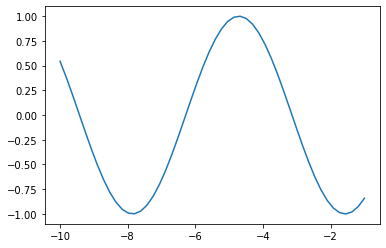

In [52]:


# calcular area bajo la curva seno
calculate_integral(-10, -1, 1, 15)


El area bajo la curva para la funtion cos(x) para los puntos :  Xo= -10 , X1= 10.5  es igual a :  0.3635346010817143


0.3635346010817143

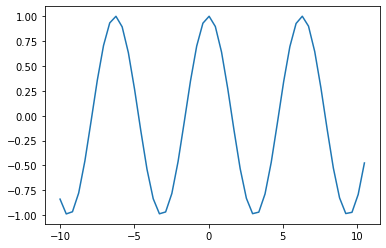

In [34]:
# calcular area bajo la curva coseno
calculate_integral(-10, 10.5, 2, 25)


El area bajo la curva para la funtion tan(x) para los puntos :  Xo= -10 , X1= 1  es igual a :  983.6858324495405


983.6858324495405

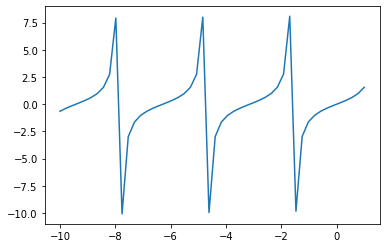

In [35]:
# calcular area bajo la curva tangente
calculate_integral(-10, 1, 3, 15)


El area bajo la curva para la funtion tan(x) para los puntos :  Xo= -1 , X1= 1  es igual a :  2.35040233686067


2.35040233686067

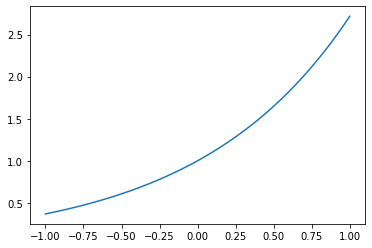

In [36]:
# calcular area bajo la curva exponencial
calculate_integral(-1, 1, 4, 10)

In [27]:
# calcular factorial de un numero dado
from random import randint
num = randint(0, 100)
print("El factorial de :", num, "es igual a : ", factorial(num))

El factorial de : 73 es igual a :  4470115461512684340891257138125051110076800700282905015819080092370422104067183317016903680000000000000000
